# 01. Preparing Notebook
# 02. Cleaning & Preparing Data
# 03. Elbow technique
# 04a. K-means algorithm for the whole data set
# 04b. K-means algorithm for 'City-Bundesländer'
# 04c. K-means culstering with just energy_dummy, year_built, year_renovated
# 04d. A different approach for subsetting cities and clustering
# 05. Future Steps

## 01. Preparing Notebook

In [1]:
# importing libraries for unsupervised machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\lifti\OneDrive\CareerFoundry\Data Immersion\Achievement6\German Housing Data'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'housing_new_without_umlauts.csv'), index_col = 0)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,2005.0,normal,2015.0,modernized,central heating,Gas,available,demand certificate,D,Baden-Wuerttemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,Middle price
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,1994.0,basic,2015.0,modernized,stove heating,NaN,not required by law,NaN,NaN,Baden-Wuerttemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,Middle price
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,1900.0,basic,2000.0,fixer-upper,central heating,Strom,available,demand certificate,G,Baden-Wuerttemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,Middle price
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,1968.0,refined,2019.0,refurbished,central heating,Oel,available,demand certificate,F,Baden-Wuerttemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,Middle price
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,1969.0,basic,2015.0,maintained,NaN,Oel,available,consumption certificate,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,35500.0,Special property,47.00,1400.0,80.0,sofort,2.0,1.0,1.0,1.0,1985.0,refined,2015.0,maintained,central heating,Gas,available for inspection,NaN,NaN,Thueringen,Saale-Orla-Kreis,Pößneck,1.0,Garage;,3.0,3.0,4.0,Low price
10535,38000.0,Farmhouse,110.00,471.0,110.0,sofort,5.0,2.0,1.0,3.0,1900.0,refined,1995.0,refurbished,stove heating,Gas,available for inspection,NaN,NaN,Thueringen,Unstrut-Hainich-Kreis,Bad Tennstedt,2.0,Outside parking lot;,3.0,4.0,4.0,Low price
10536,348000.0,NaN,200.00,1610.0,650.0,sofort,7.0,5.0,2.0,2.0,1974.0,normal,1996.0,renovated,stove heating,Oel,available for inspection,NaN,NaN,Thueringen,Eichsfeld (Kreis),Bernterode (bei Heilbad Heiligenstadt),6.0,Duplex lot;,2.0,6.0,4.0,Middle price
10537,472500.0,Duplex,485.00,320.0,135.0,sofort,15.0,11.0,4.0,3.0,1906.0,NaN,2010.0,fixer-upper,stove heating,Gas,available,demand certificate,NaN,Thueringen,Unstrut-Hainich-Kreis,Muehlhausen/Thueringen,4.0,Outside parking lot;,2.0,2.0,4.0,Middle price


## 02. Cleaning & Preparing Data

In [6]:
# Dropping all categorical variables
df_k = df.drop (columns = ['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype;', 'Price category'])

In [7]:
df_k

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy
0,498000.0,106.00,229.0,80.0,5.5,3.0,1.0,2.0,2005.0,2015.0,2.0,2.0,5.0,5.0
1,495000.0,140.93,517.0,20.0,6.0,3.0,2.0,2.0,1994.0,2015.0,7.0,1.0,5.0,4.0
3,259000.0,140.00,814.0,80.0,4.0,4.0,2.0,2.0,1900.0,2000.0,1.0,1.0,2.0,2.0
4,469000.0,115.00,244.0,80.0,4.5,2.0,1.0,2.0,1968.0,2019.0,1.0,3.0,4.0,3.0
5,1400000.0,310.00,860.0,100.0,8.0,4.0,2.0,3.0,1969.0,2015.0,2.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,35500.0,47.00,1400.0,80.0,2.0,1.0,1.0,1.0,1985.0,2015.0,1.0,3.0,3.0,4.0
10535,38000.0,110.00,471.0,110.0,5.0,2.0,1.0,3.0,1900.0,1995.0,2.0,3.0,4.0,4.0
10536,348000.0,200.00,1610.0,650.0,7.0,5.0,2.0,2.0,1974.0,1996.0,6.0,2.0,6.0,4.0
10537,472500.0,485.00,320.0,135.0,15.0,11.0,4.0,3.0,1906.0,2010.0,4.0,2.0,2.0,4.0


In [11]:
# Standardization is a must for out dataset
scaler = StandardScaler()
scaled = scaler.fit_transform(df_k)
print(scaled)

[[-0.09220274 -0.66087798 -0.14279157 ...  0.10458693  0.53799003
   0.55736961]
 [-0.09712914 -0.45112524 -0.1099412  ... -1.28650432  0.53799003
  -0.0616777 ]
 [-0.48467304 -0.45670984 -0.07606426 ... -1.28650432 -1.46894312
  -1.2997723 ]
 ...
 [-0.33852301 -0.09641311  0.01473052 ...  0.10458693  1.20696774
  -0.0616777 ]
 [-0.13407718  1.61499633 -0.13241177 ...  0.10458693 -1.46894312
  -0.0616777 ]
 [-0.74741466  0.50408143 -0.07195796 ...  0.10458693 -1.46894312
  -1.2997723 ]]


## 03. Elbow technique

In [12]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3640883793212357.5,
 -1777836200450409.8,
 -996426997607736.2,
 -635268133388077.1,
 -415955153585623.4,
 -285210674616372.7,
 -202203955583136.9,
 -159548430067960.75,
 -126132138373880.11]

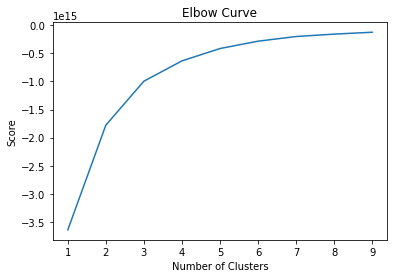

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Lets try with 3 clusters because after this point the curve straightens out.

## 04a. Running k-means algorithm for the whole data set

In [69]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [70]:
# Fit the k-means object to the data.

kmeans.fit(df_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [71]:
df_k['clusters'] = kmeans.fit_predict(df_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [72]:
df_k.head()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy,clusters
0,498000.0,106.00,229.0,80.0,5.5,3.0,1.0,2.0,2005.0,2015.0,2.0,2.0,5.0,5.0,0
1,495000.0,140.93,517.0,20.0,6.0,3.0,2.0,2.0,1994.0,2015.0,7.0,1.0,5.0,4.0,0
3,259000.0,140.00,814.0,80.0,4.0,4.0,2.0,2.0,1900.0,2000.0,1.0,1.0,2.0,2.0,0
4,469000.0,115.00,244.0,80.0,4.5,2.0,1.0,2.0,1968.0,2019.0,1.0,3.0,4.0,3.0,0
5,1400000.0,310.00,860.0,100.0,8.0,4.0,2.0,3.0,1969.0,2015.0,2.0,1.0,3.0,4.0,1


In [73]:
df_k['clusters'].value_counts()

0    8579
1    1163
2      74
Name: clusters, dtype: int64

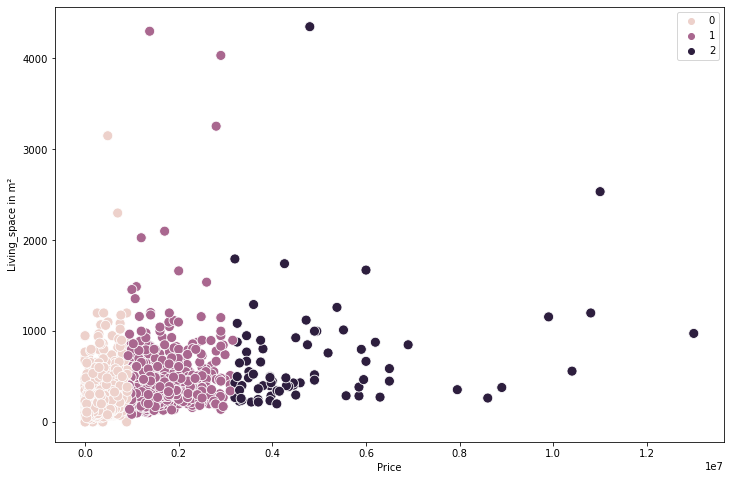

In [22]:
# Plot the clusters for the "Price" and "Living_space" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Living_space'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Living_space in m²') # Label y-axis.
plt.show()

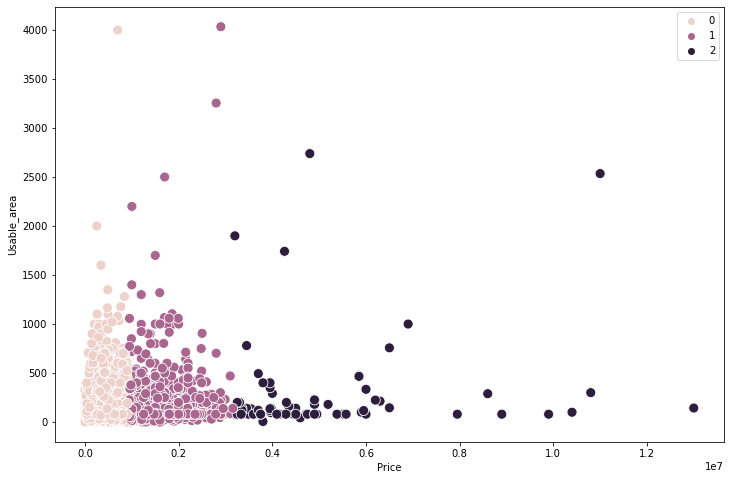

In [23]:
# Plot the clusters for the "Price" and "Usable_area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Usable_area'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Usable_area') 
plt.show()

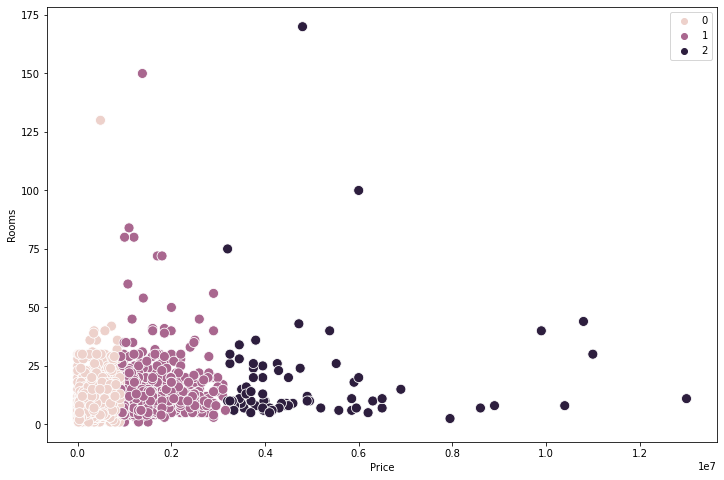

In [24]:
# Plot the clusters for the "Price" and "Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Rooms'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Rooms') 
plt.show()

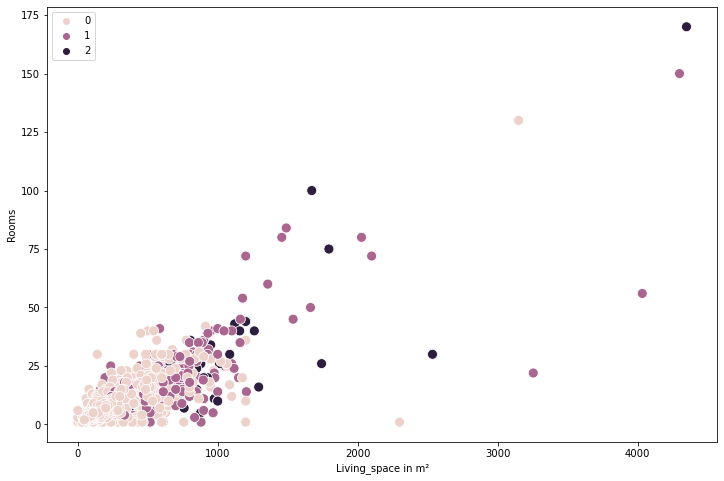

In [25]:
# Plot the clusters for the "LIving_space" and "Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Living_space'], y=df_k['Rooms'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Living_space in m²') 
plt.ylabel('Rooms') 
plt.show()

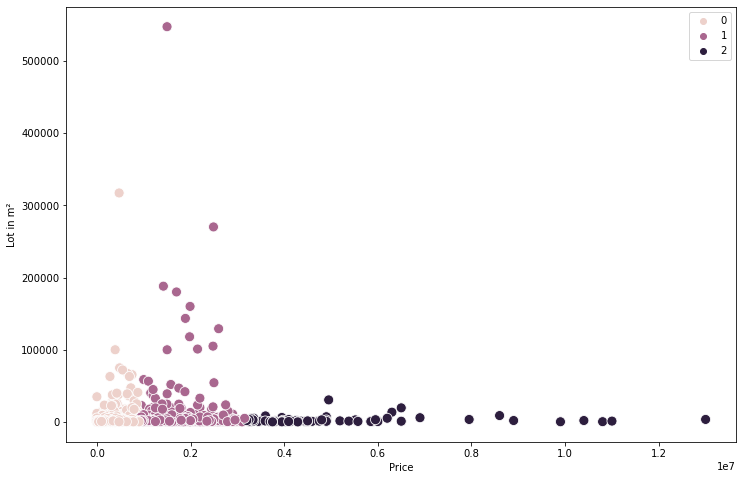

In [26]:
# Plot the clusters for the "Price" and "Lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Lot'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Lot in m²') 
plt.show()

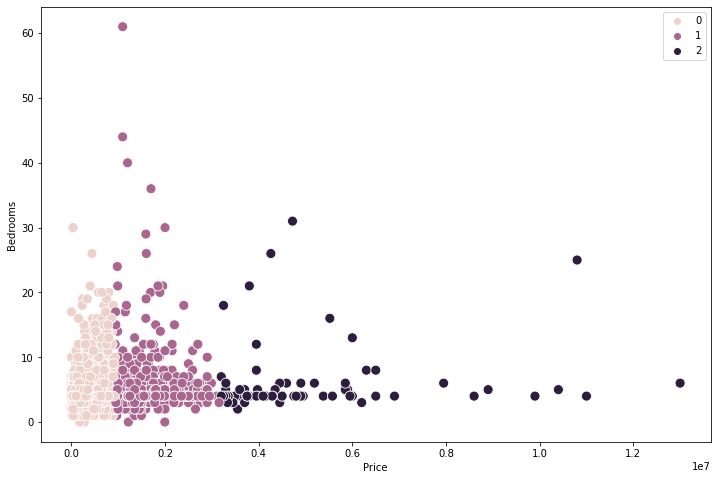

In [27]:
# Plot the clusters for the "Price" and "Bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Bedrooms'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Bedrooms') 
plt.show()

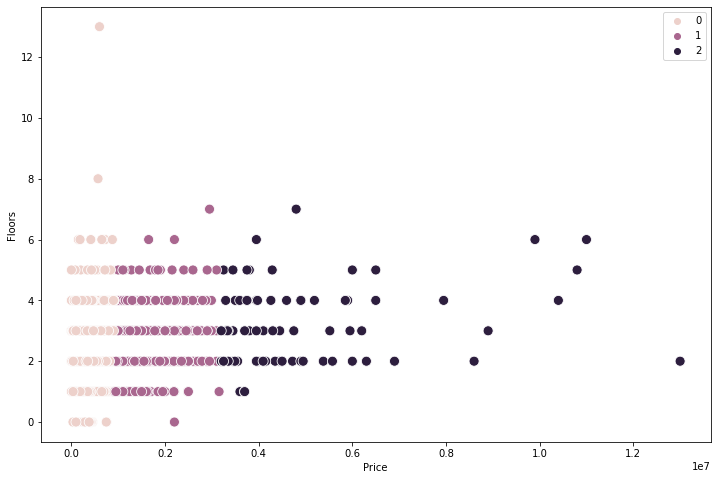

In [28]:
# Plot the clusters for the "Price" and "Floors" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Floors'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Floors') 
plt.show()

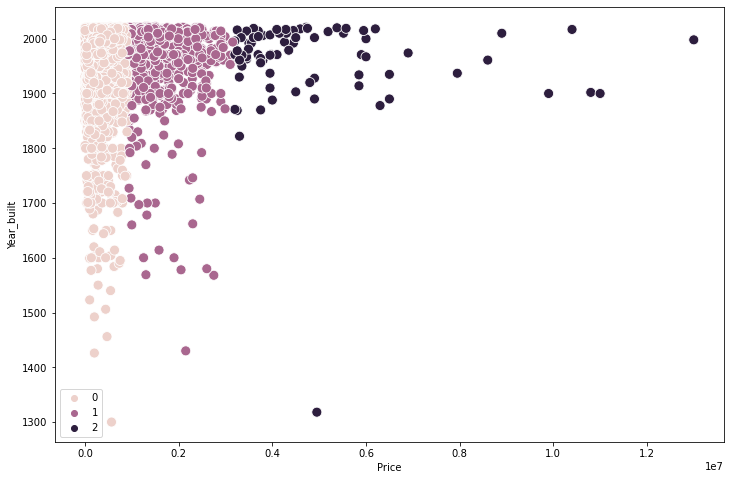

In [29]:
# Plot the clusters for the "Price" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Year_built'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Year_built') 
plt.show()

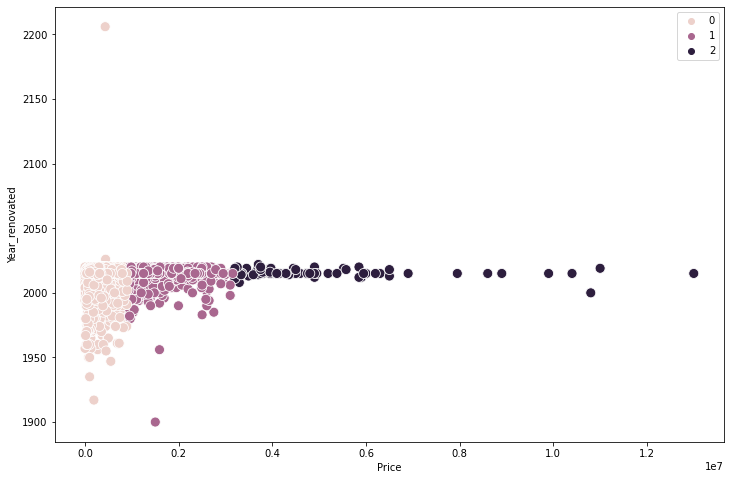

In [30]:
# Plot the clusters for the "Price" and "Year_renovated" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Year_renovated'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Year_renovated') 
plt.show()

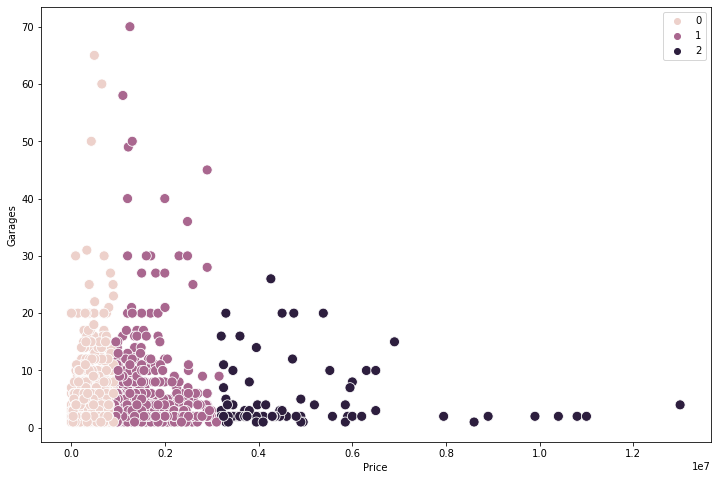

In [31]:
# Plot the clusters for the "Price" and "Garages" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['Garages'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('Garages') 
plt.show()

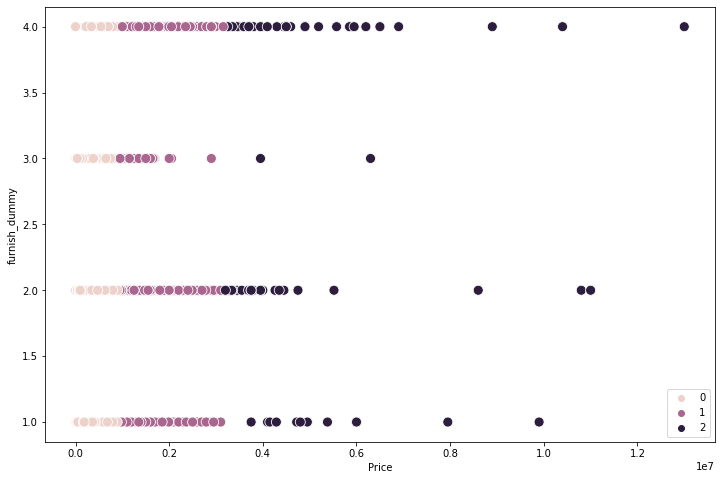

In [32]:
# Plot the clusters for the "Price" and "furnish_dummy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['furnish_dummy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('furnish_dummy') 
plt.show()

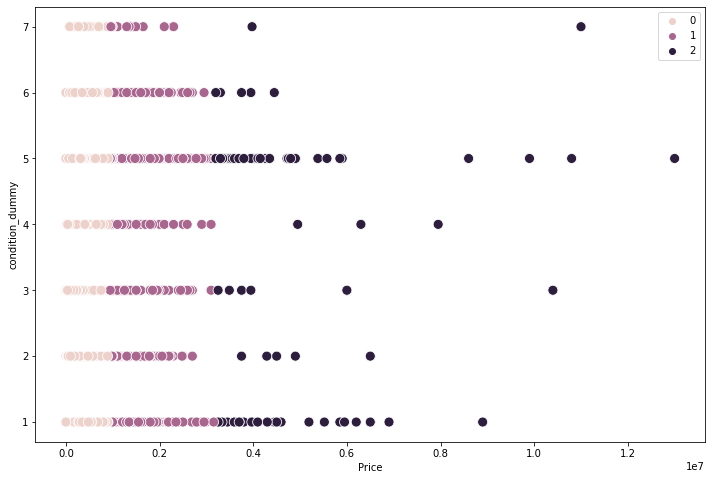

In [33]:
# Plot the clusters for the "Price" and "condition_dummy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['condition_dummy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('condition_dummy') 
plt.show()

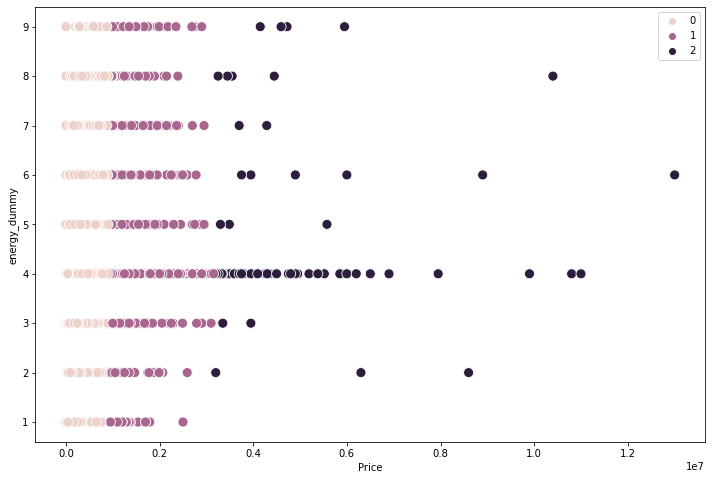

In [34]:
# Plot the clusters for the "Price" and "energy_dummy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Price'], y=df_k['energy_dummy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Price') 
plt.ylabel('energy_dummy') 
plt.show()

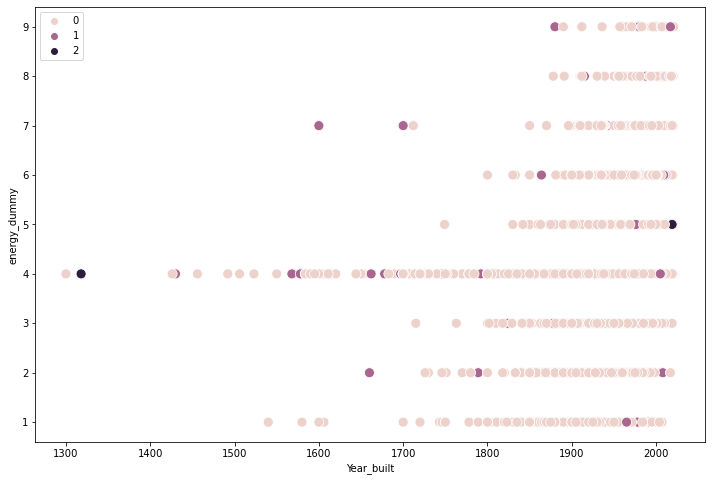

In [74]:
# Plot the clusters for the "Year_built" and "energy_dummy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Year_built'], y=df_k['energy_dummy'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year_built') 
plt.ylabel('energy_dummy') 
plt.show()

In [52]:
df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'purple'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'pink'

In [53]:
df_k.groupby('cluster').agg({
    'Price':['mean','median'],
    'Living_space':['mean','median'],
    'Lot':['mean','median'],
    'Usable_area':['mean','median'],
    'Rooms':['mean','median'],
    'Bedrooms':['mean','median'],
    'Bathrooms':['mean','median'],
    'Floors':['mean','median'],
    'Year_built':['mean','median'],
    'Year_renovated':['mean','median'],
    'Garages':['mean','median'],
    'furnish_dummy':['mean','median'],
    'condition_dummy':['mean','median'],
    'energy_dummy':['mean','median']
    
})

Price            Living_space                   Lot  \
                     mean     median         mean   median         mean   
cluster                                                                   
dark purple  4.950346e+06  4260000.0   693.233896  490.000  2744.536104   
pink         3.926321e+05   369000.0   192.233061  165.000  1128.184724   
purple       1.445957e+06  1300000.0   358.841561  298.125  3975.773217   

                    Usable_area             Rooms         Bedrooms         \
             median        mean median       mean median      mean median   
cluster                                                                     
dark purple  1309.0  284.719481  117.0  18.564935   10.0  6.103896    4.0   
pink          620.0  100.827146   80.0   6.834131    6.0  3.979223    4.0   
purple        879.5  157.819155   80.0  10.704778    8.0  4.985495    4.0   

            Bathrooms           Floors          Year_built          \
                 mean median      mean median         mean  median   
cluster                                                              
dark purple  4.792208    3.0  3.181818    3.0  1959.415584  1971.0   
pink         2.105404    2.0  2.167737    2.0  1958.791759  1971.0   
purple       3.180887    2.0  2.510239    2.0  1968.339590  1978.0   

            Year_renovated           Garages        furnish_dummy         \
                      mean  median      mean median          mean median   
cluster                                                                    
dark purple    2015.610390  2015.0  5.103896    2.0      2.779221    2.0   
pink           2012.626357  2015.0  2.363955    2.0      1.876153    2.0   
purple         2013.905290  2015.0  3.733788    2.0      2.224403    2.0   

            condition_dummy        energy_dummy         
                       mean median         mean median  
cluster                                                 
dark purple        3.506494    5.0     4.688312    4.0  
pink               4.253414    5.0     4.022061    4.0  
purple             3.819966    5.0     4.627986    4.0

#### The interpretation of the visualizations is difficult. That is why I will interpret the descriptive analysis of the unsupervised clustering:
#### The clustering it seems is done by the size of the numbers of every variable. Basically one can say "pink" houses are the cheapest and have the least living_space, lot, usable_area, rooms, bedrooms, bathrooms, garages. In the middle lies "purple" and number one is "dark purple". But sometimes the mean and median bring different results. 
#### The year_built is for "dark purple" and "pink" the same, "purple" houses are younger.
#### The year_renovated seems almost indentical for all houses (the median says it is), therefore one can interpret the for selling a house it is imperative to renovate the house - the visualization alone gives a different picture.  
#### Maybe a new insight would be that, when a building is revonated it will be renovated in such a way that the energy efficiency is in the middle of the scale and not at the highest point. Maybe such a renovation would be much too expensive.

# 04b. Lets have a look at 'City-Bundesländer'

In [35]:
city_list = ['Hamburg', 'Bremen', 'Berlin']

In [36]:
# subsetting city states
df_city = df[df['State'].isin(city_list)]

In [39]:
# Dropping all categorical variables
df_city_k = df_city.drop (columns = ['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype;', 'Price category'])

In [42]:
df_city_k

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy
2635,1650000.0,260.00,988.0,80.0,12.0,5.0,2.0,2.0,1934.0,2015.0,2.0,1.0,5.0,4.0
2636,1850000.0,545.00,1378.0,325.0,12.0,4.0,2.0,2.0,1999.0,2015.0,1.0,4.0,5.0,4.0
2637,398000.0,70.00,676.0,80.0,3.0,4.0,2.0,2.0,1948.0,2015.0,1.0,3.0,3.0,4.0
2638,398000.0,113.00,855.0,80.0,6.0,4.0,2.0,2.0,1912.0,2015.0,1.0,2.0,5.0,4.0
2639,280000.0,90.13,531.0,80.0,4.0,4.0,2.0,2.0,1930.0,2015.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,570000.0,102.00,700.0,65.0,5.0,4.0,2.0,4.0,2006.0,2015.0,2.0,2.0,1.0,4.0
3421,597000.0,103.60,103.6,92.0,3.0,4.0,1.0,3.0,2012.0,2015.0,2.0,2.0,1.0,4.0
3422,1449000.0,264.00,950.0,161.0,6.0,4.0,3.0,2.0,2010.0,2015.0,5.0,4.0,1.0,4.0
3423,689000.0,193.00,550.0,33.0,7.0,5.0,2.0,3.0,1990.0,2015.0,1.0,2.0,5.0,6.0


In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(df_city_k).score(df_city_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-452323162835112.44,
 -132319857091679.45,
 -68088643729013.21,
 -34046694307657.773,
 -19418101240492.32,
 -12605858153906.781,
 -8444077900860.688,
 -6446804681145.605,
 -4528824759004.765]

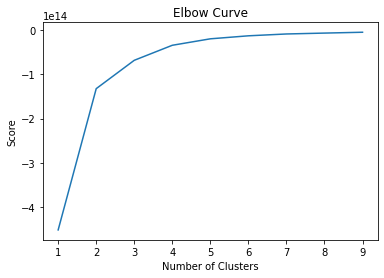

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Lets try 3 clusters because at this point the curve straightens out.

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [47]:
# Fit the k-means object to the data.

kmeans.fit(df_city_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [48]:
df_city_k['clusters'] = kmeans.fit_predict(df_city_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [49]:
df_city_k['clusters'].value_counts()

0    242
2     42
1      7
Name: clusters, dtype: int64

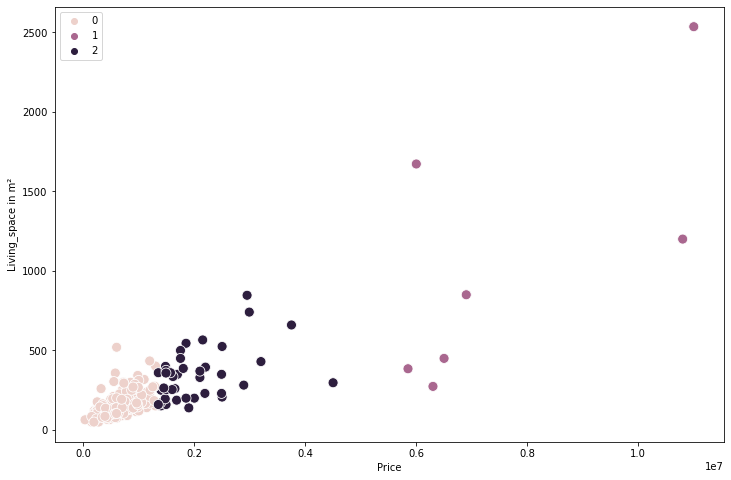

In [51]:
# Plot the clusters for the "Price" and "Living_space" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Price'], y=df_city_k['Living_space'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Living_space in m²')
plt.show()

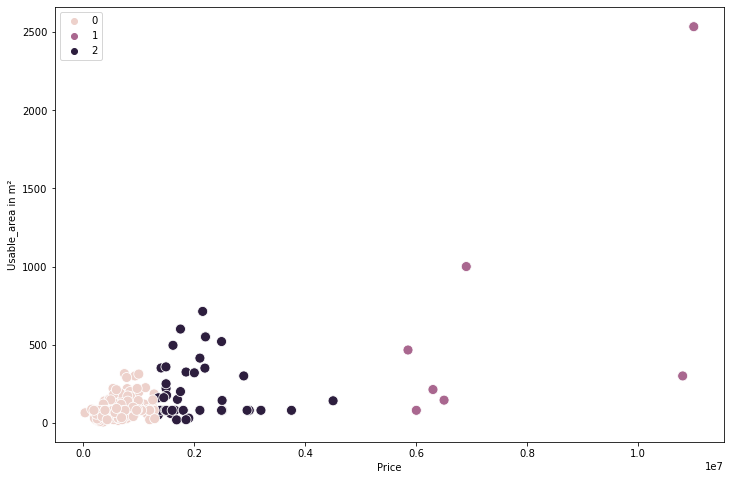

In [54]:
# Plot the clusters for the "Price" and "Usable_area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Price'], y=df_city_k['Usable_area'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Usable_area in m²')
plt.show()

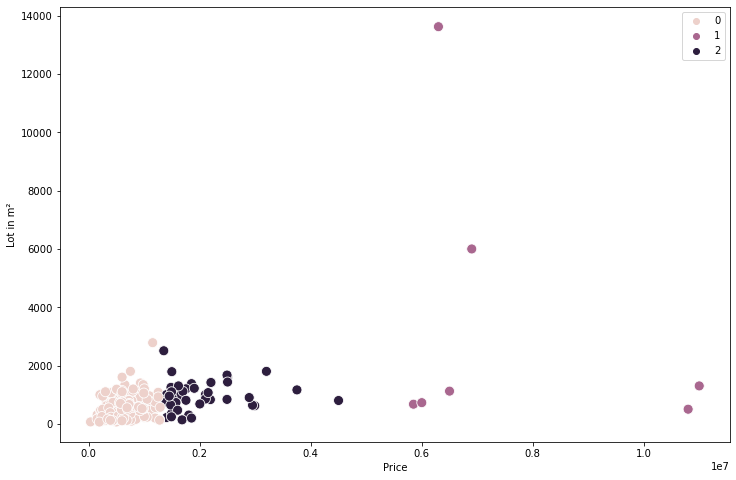

In [55]:
# Plot the clusters for the "Price" and "Lot" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Price'], y=df_city_k['Lot'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Lot in m²')
plt.show()

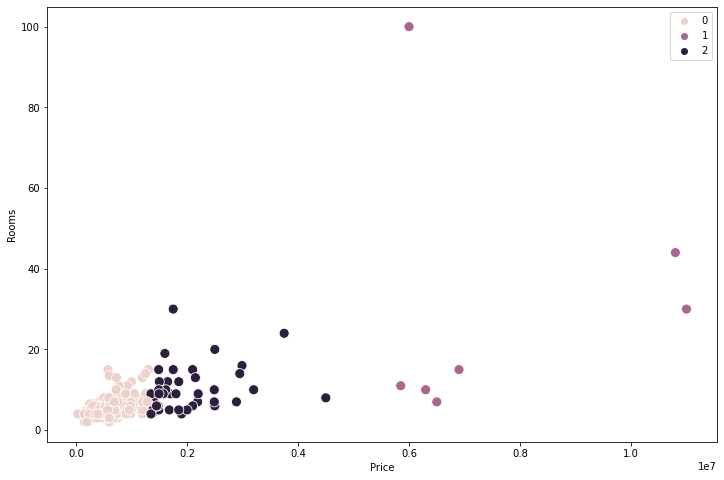

In [56]:
# Plot the clusters for the "Price" and "Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Price'], y=df_city_k['Rooms'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.show()

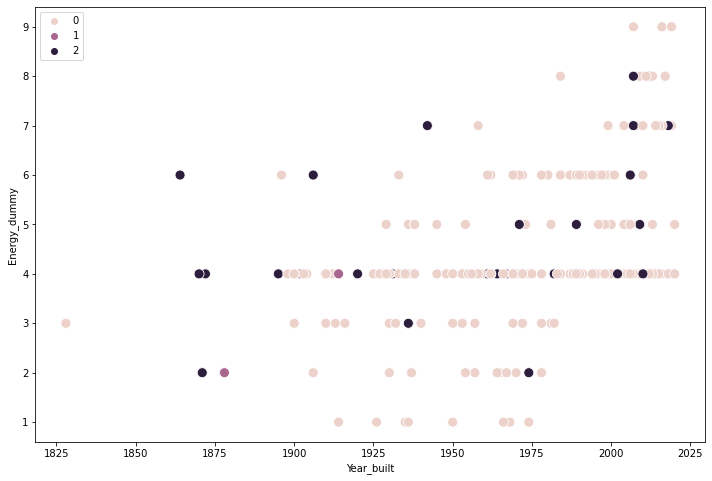

In [58]:
# Plot the clusters for the "Price" and "Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Year_built'], y=df_city_k['energy_dummy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Year_built')
plt.ylabel('Energy_dummy')
plt.show()

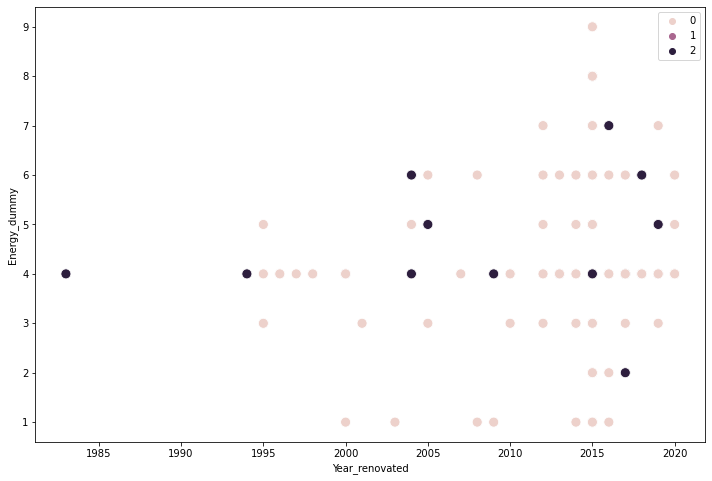

In [59]:
# Plot the clusters for the "Price" and "Rooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Year_renovated'], y=df_city_k['energy_dummy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Year_renovated')
plt.ylabel('Energy_dummy')
plt.show()

In [60]:
df_city_k.loc[df_city_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_city_k.loc[df_city_k['clusters'] == 1, 'cluster'] = 'purple'
df_city_k.loc[df_city_k['clusters'] == 0, 'cluster'] = 'pink'

In [61]:
df_city_k.groupby('cluster').agg({
    'Price':['mean','median'],
    'Living_space':['mean','median'],
    'Lot':['mean','median'],
    'Usable_area':['mean','median'],
    'Rooms':['mean','median'],
    'Bedrooms':['mean','median'],
    'Bathrooms':['mean','median'],
    'Floors':['mean','median'],
    'Year_built':['mean','median'],
    'Year_renovated':['mean','median'],
    'Garages':['mean','median'],
    'furnish_dummy':['mean','median'],
    'condition_dummy':['mean','median'],
    'energy_dummy':['mean','median']
    
})

Price            Living_space                  Lot  \
                     mean     median         mean  median         mean   
cluster                                                                  
dark purple  2.015881e+06  1775000.0   344.963571  343.00   977.583333   
pink         6.251920e+05   590000.0   152.767727  136.39   580.355785   
purple       7.621429e+06  6500000.0  1052.287143  850.01  3420.715714   

                    Usable_area             Rooms         Bedrooms         \
             median        mean median       mean median      mean median   
cluster                                                                     
dark purple   925.0  210.166667  142.0  10.071429    9.0  4.428571    4.0   
pink          539.0   89.664711   80.0   5.452479    5.0  3.611570    4.0   
purple       1120.0  677.000000  300.0  31.000000   15.0  7.857143    4.0   

            Bathrooms           Floors          Year_built          \
                 mean median      mean median         mean  median   
cluster                                                              
dark purple  2.785714    2.0  2.666667    2.0  1966.214286  1977.0   
pink         1.917355    2.0  2.165289    2.0  1971.714876  1972.0   
purple       8.857143    2.0  4.142857    5.0  1924.285714  1914.0   

            Year_renovated           Garages        furnish_dummy         \
                      mean  median      mean median          mean median   
cluster                                                                    
dark purple    2013.261905  2015.0  1.928571    2.0      2.333333    2.0   
pink           2014.045455  2015.0  1.685950    2.0      1.909091    2.0   
purple         2013.857143  2015.0  5.000000    2.0      2.857143    3.0   

            condition_dummy        energy_dummy         
                       mean median         mean median  
cluster                                                 
dark purple        3.238095    3.5     4.880952    4.0  
pink               4.045455    5.0     4.326446    4.0  
purple             3.714286    4.0     3.714286    4.0

#### The only interessting thing here is that the most expensive houses in the city are much more older than the new houses, but in order to keep they price the need to be renovated.

## 04c. Lets try culstering with just energy_dummy, year_built, year_renovated.

In [86]:
# Dropping all categorical variables
df_energy = df.drop (columns = ['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype;', 'Price category', 'Living_space','Lot','Usable_area','Rooms','Bedrooms','Bathrooms','Floors','Garages','furnish_dummy','condition_dummy','Price'])

In [87]:
df_energy

,Year_built,Year_renovated,energy_dummy
0,2005.0,2015.0,5.0
1,1994.0,2015.0,4.0
3,1900.0,2000.0,2.0
4,1968.0,2019.0,3.0
5,1969.0,2015.0,4.0
...,...,...,...
10534,1985.0,2015.0,4.0
10535,1900.0,1995.0,4.0
10536,1974.0,1996.0,4.0
10537,1906.0,2010.0,4.0


In [88]:
# Standardization is a must for out dataset
scaler = StandardScaler()
scaled = scaler.fit_transform(df_energy)
print(scaled)

[[ 0.84459026  0.27935032  0.55736961]
 [ 0.63842517  0.27935032 -0.0616777 ]
 [-1.12334923 -1.62744775 -1.2997723 ]
 ...
 [ 0.26357955 -2.13592723 -0.0616777 ]
 [-1.01089554 -0.35624904 -0.0616777 ]
 [-2.37908204  0.40647019 -1.2997723 ]]


In [89]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [90]:
score = [kmeans[i].fit(df_energy).score(df_energy) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-28577131.125407178,
 -13219629.79322127,
 -6672735.176966483,
 -4436920.8027206445,
 -3008335.7335559013,
 -2382229.5081960433,
 -1888275.2895760608,
 -1624596.8042985515,
 -1413298.5101453904]

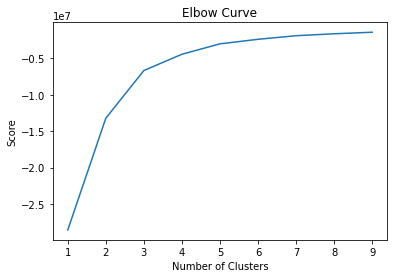

In [91]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### I will use again 3 clusters

In [92]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [93]:
# Fit the k-means object to the data.

kmeans.fit(df_energy)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [94]:
df_energy['clusters'] = kmeans.fit_predict(df_energy)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [95]:
df_energy['clusters'].value_counts()

1    7246
0    2369
2     201
Name: clusters, dtype: int64

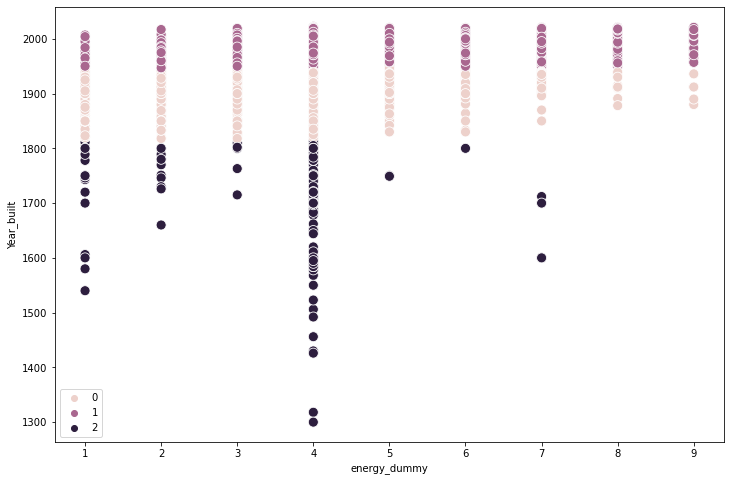

In [96]:
# Plot the clusters for the "Price" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_energy['energy_dummy'], y=df_energy['Year_built'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('energy_dummy') 
plt.ylabel('Year_built') 
plt.show()

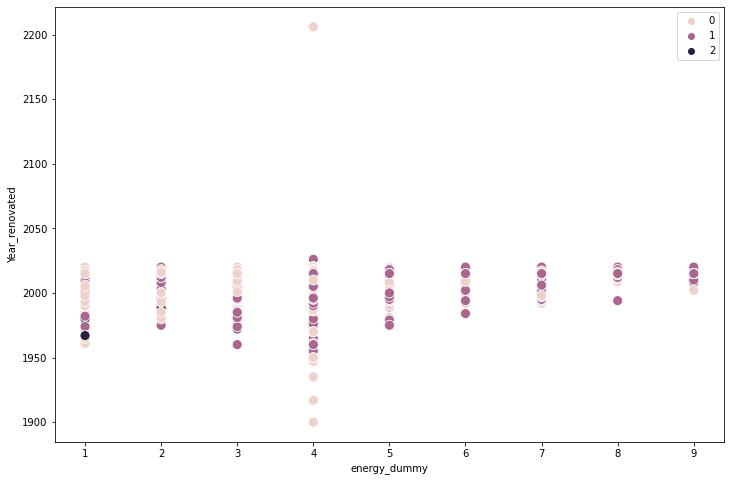

In [98]:
# Plot the clusters for the "Price" and "Year_built" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_energy['energy_dummy'], y=df_energy['Year_renovated'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('energy_dummy') 
plt.ylabel('Year_renovated') 
plt.show()

In [99]:
df_energy.loc[df_energy['clusters'] == 2, 'cluster'] = 'dark purple'
df_energy.loc[df_energy['clusters'] == 1, 'cluster'] = 'purple'
df_energy.loc[df_energy['clusters'] == 0, 'cluster'] = 'pink'

In [100]:
df_energy.groupby('cluster').agg({
    'Year_built':['mean','median'],
    'Year_renovated':['mean','median'],
    'energy_dummy':['mean','median']
    
})

Year_built         Year_renovated         energy_dummy       
                    mean  median           mean  median         mean median
cluster                                                                    
dark purple  1719.353234  1749.0    2009.308458  2015.0     3.611940    4.0
pink         1908.548755  1910.0    2010.503166  2015.0     3.425918    4.0
purple       1983.410985  1980.0    2013.651118  2015.0     4.333425    4.0

#### Even though the houses have a very different building year for all groups, the renovation was done between 9 and 14 years ago, but the energy efficiency is not much different. It seems that the renovation that is happeing for houses lifts the energy effeciency just to the middle of the scale.

## 04d. Lets try subsetting and clustering "city" without the word "Kreis". I assume then I will group just cities.

In [102]:
df.head()

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,2005.0,normal,2015.0,modernized,central heating,Gas,available,demand certificate,D,Baden-Wuerttemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,Middle price
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,1994.0,basic,2015.0,modernized,stove heating,NaN,not required by law,NaN,NaN,Baden-Wuerttemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,Middle price
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,1900.0,basic,2000.0,fixer-upper,central heating,Strom,available,demand certificate,G,Baden-Wuerttemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,Middle price
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,1968.0,refined,2019.0,refurbished,central heating,Oel,available,demand certificate,F,Baden-Wuerttemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,Middle price
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,1969.0,basic,2015.0,maintained,NaN,Oel,available,consumption certificate,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price


In [162]:
# Creating list for every name in "City" which contains "Kreis"
Kreis_list = df.groupby("City")["City"].apply(lambda ser: ser.str.contains("Kreis"))

In [163]:
# Creating list for every name in "City" which contains "kreis"
kreis_list = df.groupby("City")["City"].apply(lambda ser: ser.str.contains("kreis"))

In [166]:
# importing the list as a new column
df['Cityyn1'] = Kreis_list

In [167]:
# importing the list as a new column
df['Cityyn2'] = kreis_list

In [173]:
df

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category,Cityyn1,Cityyn2
0,498000.0,Multiple dwelling,106.00,229.0,80.0,01.10.2020,5.5,3.0,1.0,2.0,2005.0,normal,2015.0,modernized,central heating,Gas,available,demand certificate,D,Baden-Wuerttemberg,Bodenseekreis,Bermatingen,2.0,Parking lot;,2.0,5.0,5.0,Middle price,False,True
1,495000.0,Mid-terrace house,140.93,517.0,20.0,01.01.2021,6.0,3.0,2.0,2.0,1994.0,basic,2015.0,modernized,stove heating,NaN,not required by law,NaN,NaN,Baden-Wuerttemberg,Konstanz (Kreis),Engen,7.0,Parking lot;,1.0,5.0,4.0,Middle price,True,False
3,259000.0,Farmhouse,140.00,814.0,80.0,nach Vereinbarung,4.0,4.0,2.0,2.0,1900.0,basic,2000.0,fixer-upper,central heating,Strom,available,demand certificate,G,Baden-Wuerttemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage;,1.0,2.0,2.0,Middle price,True,False
4,469000.0,Multiple dwelling,115.00,244.0,80.0,sofort,4.5,2.0,1.0,2.0,1968.0,refined,2019.0,refurbished,central heating,Oel,available,demand certificate,F,Baden-Wuerttemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage;,3.0,4.0,3.0,Middle price,True,False
5,1400000.0,Mid-terrace house,310.00,860.0,100.0,sofort,8.0,4.0,2.0,3.0,1969.0,basic,2015.0,maintained,NaN,Oel,available,consumption certificate,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,35500.0,Special property,47.00,1400.0,80.0,sofort,2.0,1.0,1.0,1.0,1985.0,refined,2015.0,maintained,central heating,Gas,available for inspection,NaN,NaN,Thueringen,Saale-Orla-Kreis,Pößneck,1.0,Garage;,3.0,3.0,4.0,Low price,True,False
10535,38000.0,Farmhouse,110.00,471.0,110.0,sofort,5.0,2.0,1.0,3.0,1900.0,refined,1995.0,refurbished,stove heating,Gas,available for inspection,NaN,NaN,Thueringen,Unstrut-Hainich-Kreis,Bad Tennstedt,2.0,Outside parking lot;,3.0,4.0,4.0,Low price,True,False
10536,348000.0,NaN,200.00,1610.0,650.0,sofort,7.0,5.0,2.0,2.0,1974.0,normal,1996.0,renovated,stove heating,Oel,available for inspection,NaN,NaN,Thueringen,Eichsfeld (Kreis),Bernterode (bei Heilbad Heiligenstadt),6.0,Duplex lot;,2.0,6.0,4.0,Middle price,True,False
10537,472500.0,Duplex,485.00,320.0,135.0,sofort,15.0,11.0,4.0,3.0,1906.0,NaN,2010.0,fixer-upper,stove heating,Gas,available,demand certificate,NaN,Thueringen,Unstrut-Hainich-Kreis,Muehlhausen/Thueringen,4.0,Outside parking lot;,2.0,2.0,4.0,Middle price,True,False


In [176]:
# subsetting data where both columns contain "False" this should be cities
df_city = df[(df['Cityyn1'] == False) & (df['Cityyn2'] == False)]

In [177]:
# a quick look at the data says my thinking is right
df_city

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,Condition,Heating,Energy_source,Energy_certificate,Energy_certificate_type,Energy_efficiency_class,State,City,Place,Garages,Garagetype;,furnish_dummy,condition_dummy,energy_dummy,Price category,Cityyn1,Cityyn2
5,1400000.0,Mid-terrace house,310.0,860.0,100.0,sofort,8.0,4.0,2.0,3.0,1969.0,basic,2015.0,maintained,NaN,Oel,available,consumption certificate,NaN,Baden-Wuerttemberg,Stuttgart,Sued,2.0,Garage;,1.0,3.0,4.0,High price,False,False
7,630000.0,Duplex,263.0,406.0,118.0,01.04.2020,10.0,4.0,2.0,3.0,1989.0,basic,2015.0,modernized,stove heating,Gas,available,demand certificate,E,Baden-Wuerttemberg,Freiburg im Breisgau,Munzingen,2.0,Garage;,1.0,5.0,4.0,High price,False,False
10,1750000.0,Mid-terrace house,210.0,1460.0,70.0,Nach Vereinbarung,6.0,4.0,2.0,3.0,1939.0,normal,2014.0,modernized,stove heating,Oel,available,consumption certificate,NaN,Baden-Wuerttemberg,Stuttgart,Schönberg,2.0,Garage;,2.0,5.0,4.0,High price,False,False
13,1180000.0,Mid-terrace house,217.0,265.0,25.0,nach Absprache,6.5,4.0,2.0,3.0,2017.0,NaN,2015.0,dilapidated,oil heating,Fernwärme,available,demand certificate,NaN,Baden-Wuerttemberg,Mannheim,Lindenhof,1.0,Outside parking lot;,2.0,1.0,4.0,High price,False,False
15,1100000.0,Duplex,230.0,526.0,47.0,nach Absprache,7.0,3.0,3.0,2.0,1914.0,NaN,1995.0,maintained,central heating,Strom,available,demand certificate,F,Baden-Wuerttemberg,Stuttgart,Plieningen,1.0,Carport;,2.0,3.0,3.0,High price,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10486,380000.0,Mid-terrace house,243.0,423.0,260.0,NaN,9.0,6.0,3.0,1.0,1971.0,refined,1990.0,refurbished,central heating,NaN,not required by law,NaN,NaN,Thueringen,Jena,Lichtenhain,1.0,Parking lot;,3.0,4.0,4.0,Middle price,False,False
10492,900000.0,Duplex,385.0,306.0,80.0,01.03.2020,13.0,9.0,4.0,3.0,1920.0,NaN,2009.0,modernized,stove heating,Gas,available for inspection,consumption certificate,NaN,Thueringen,Weimar,Nordvorstadt,1.0,Garage;,2.0,5.0,4.0,High price,False,False
10502,269000.0,Multiple dwelling,92.0,170.0,92.0,01.09.2020,4.5,3.0,2.0,2.0,1994.0,normal,2005.0,modernized,heat pump,Gas,not required by law,NaN,NaN,Thueringen,Jena,Isserstedt,2.0,Outside parking lot;,2.0,5.0,4.0,Middle price,False,False
10520,185000.0,Mid-terrace house,114.0,650.0,114.0,nach Vereinbarung,4.0,3.0,2.0,1.0,1991.0,basic,2015.0,modernized,stove heating,Gas,available,consumption certificate,D,Thueringen,Suhl,Suhl-Lautenberg,4.0,Outside parking lot;,1.0,5.0,5.0,Low price,False,False


In [180]:
df_city.dtypes

Price                      float64
Type                        object
Living_space               float64
Lot                        float64
Usable_area                float64
Free_of_Relation            object
Rooms                      float64
Bedrooms                   float64
Bathrooms                  float64
Floors                     float64
Year_built                 float64
Furnishing_quality          object
Year_renovated             float64
Condition                   object
Heating                     object
Energy_source               object
Energy_certificate          object
Energy_certificate_type     object
Energy_efficiency_class     object
State                       object
City                        object
Place                       object
Garages                    float64
Garagetype;                 object
furnish_dummy              float64
condition_dummy            float64
energy_dummy               float64
Price category              object
Cityyn1             

In [178]:
# lets have a look at this correlation
df_city.corr()

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy,Cityyn1,Cityyn2
Price,1.000000,0.584790,0.126195,0.374170,0.421566,0.259589,0.343598,0.310837,-0.030839,0.041805,0.246463,0.217612,-0.122438,0.116272,NaN,NaN
Living_space,0.584790,1.000000,0.093705,0.547764,0.861923,0.336758,0.422801,0.368115,-0.187542,0.025540,0.345231,0.060177,0.003038,0.021711,NaN,NaN
Lot,0.126195,0.093705,1.000000,0.076196,0.038076,0.013562,0.017968,-0.035575,-0.048660,-0.010402,0.103507,0.028860,0.022447,-0.020491,NaN,NaN
Usable_area,0.374170,0.547764,0.076196,1.000000,0.442397,0.124304,0.119469,0.191537,-0.091450,0.010291,0.140543,0.056237,0.008598,-0.000088,NaN,NaN
Rooms,0.421566,0.861923,0.038076,0.442397,1.000000,0.384077,0.439154,0.368685,-0.185376,0.012606,0.257794,-0.023017,0.024912,-0.015719,NaN,NaN
Bedrooms,0.259589,0.336758,0.013562,0.124304,0.384077,1.000000,0.605625,0.183747,-0.057864,0.016230,0.225388,0.021110,0.018740,0.023660,NaN,NaN
Bathrooms,0.343598,0.422801,0.017968,0.119469,0.439154,0.605625,1.000000,0.251007,-0.109665,0.017570,0.218430,0.052203,0.016378,0.036523,NaN,NaN
Floors,0.310837,0.368115,-0.035575,0.191537,0.368685,0.183747,0.251007,1.000000,-0.093993,0.063351,0.074001,0.044683,-0.016474,0.050051,NaN,NaN
Year_built,-0.030839,-0.187542,-0.048660,-0.091450,-0.185376,-0.057864,-0.109665,-0.093993,1.000000,0.117038,-0.134922,0.058077,-0.166612,0.357413,NaN,NaN
Year_renovated,0.041805,0.025540,-0.010402,0.010291,0.012606,0.016230,0.017570,0.063351,0.117038,1.000000,0.025763,-0.036782,-0.030451,0.118380,NaN,NaN


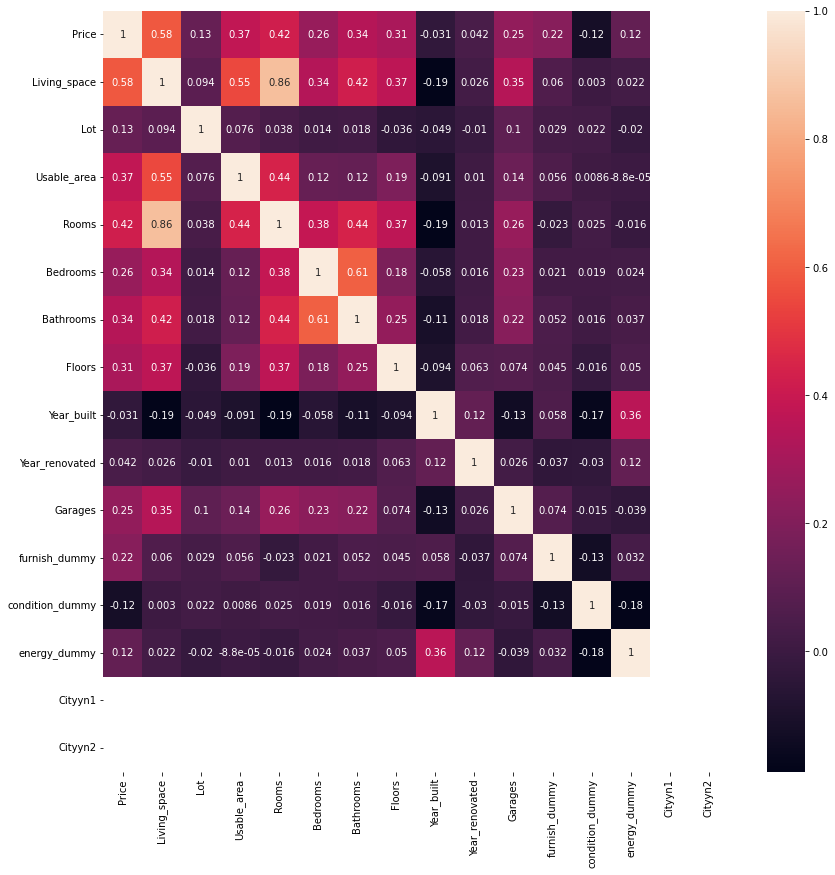

In [179]:
f,ax = plt.subplots(figsize=(14,14))
corr = sns.heatmap(df_city.corr(), annot = True, ax = ax)

#### The correlation is not much different to the whole of germany. Therefore I can assume (if my reasoning with the "Kreis" is correct) that the bigger the cities the higher the correlation between "Living_space" and "Price". Because Hamburg and Berlin are the two biggest cities of germany, but "Bremen" is much smaller.

In [182]:
# lets drop all object and bool columns
df_city_k = df_city.drop (columns = ['Type', 'Free_of_Relation', 'Furnishing_quality', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garagetype;', 'Price category', 'Cityyn1','Cityyn2'])

In [183]:
df_city_k

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,furnish_dummy,condition_dummy,energy_dummy
5,1400000.0,310.0,860.0,100.0,8.0,4.0,2.0,3.0,1969.0,2015.0,2.0,1.0,3.0,4.0
7,630000.0,263.0,406.0,118.0,10.0,4.0,2.0,3.0,1989.0,2015.0,2.0,1.0,5.0,4.0
10,1750000.0,210.0,1460.0,70.0,6.0,4.0,2.0,3.0,1939.0,2014.0,2.0,2.0,5.0,4.0
13,1180000.0,217.0,265.0,25.0,6.5,4.0,2.0,3.0,2017.0,2015.0,1.0,2.0,1.0,4.0
15,1100000.0,230.0,526.0,47.0,7.0,3.0,3.0,2.0,1914.0,1995.0,1.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10486,380000.0,243.0,423.0,260.0,9.0,6.0,3.0,1.0,1971.0,1990.0,1.0,3.0,4.0,4.0
10492,900000.0,385.0,306.0,80.0,13.0,9.0,4.0,3.0,1920.0,2009.0,1.0,2.0,5.0,4.0
10502,269000.0,92.0,170.0,92.0,4.5,3.0,2.0,2.0,1994.0,2005.0,2.0,2.0,5.0,4.0
10520,185000.0,114.0,650.0,114.0,4.0,3.0,2.0,1.0,1991.0,2015.0,4.0,1.0,5.0,5.0


In [184]:
# lets do a clustering for df_city
scaler = StandardScaler()
scaled = scaler.fit_transform(df_city_k)
print(scaled)

[[ 0.57822875  0.39076574 -0.01223336 ... -1.28033876 -0.69019367
  -0.08007116]
 [-0.26137866  0.15488095 -0.13682947 ... -1.28033876  0.56722813
  -0.08007116]
 [ 0.95986848 -0.11111679  0.15243109 ...  0.03144982  0.56722813
  -0.08007116]
 ...
 [-0.65501278 -0.70333818 -0.20159748 ...  0.03144982  0.56722813
  -0.08007116]
 [-0.74660632 -0.59292402 -0.06986592 ... -1.28033876  0.56722813
   0.57750806]
 [-0.84038065  0.34057748 -0.01497777 ...  0.03144982 -1.31890457
  -1.39522959]]


In [185]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [186]:
score = [kmeans[i].fit(df_city_k).score(df_city_k) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


[-1333107215292744.2,
 -582370843734958.2,
 -283037299193205.94,
 -173594613970886.06,
 -118789667223913.6,
 -78605701846237.98,
 -50144166217873.55,
 -38193030227460.164,
 -29314982787757.777]

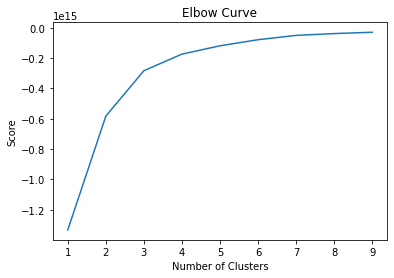

In [187]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### 3 clusters should be right.

In [188]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [189]:
# Fit the k-means object to the data.

kmeans.fit(df_city_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [190]:
df_city_k['clusters'] = kmeans.fit_predict(df_city_k)

C:\Users\lifti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [192]:
df_city_k['clusters'].value_counts()

0    1253
2     300
1      32
Name: clusters, dtype: int64

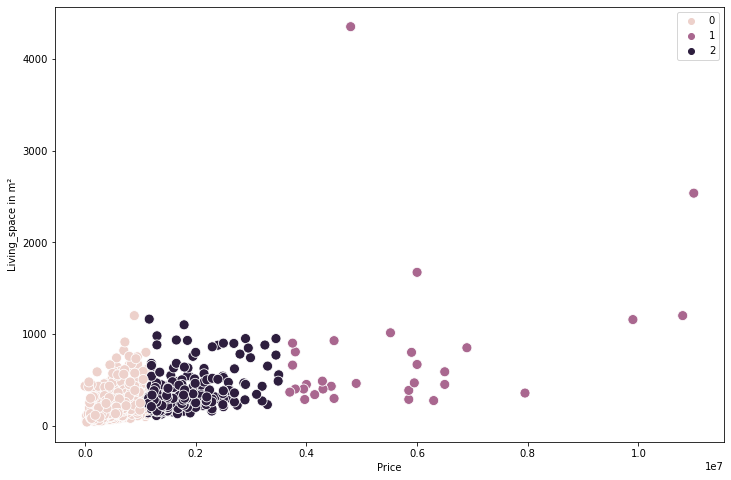

In [193]:
# Plot the clusters for the "Price" and "Living_space" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_city_k['Price'], y=df_city_k['Living_space'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Living_space in m²') # Label y-axis.
plt.show()

In [194]:
df_city_k.loc[df_city_k['clusters'] == 2, 'cluster'] = 'dark purple'
df_city_k.loc[df_city_k['clusters'] == 1, 'cluster'] = 'purple'
df_city_k.loc[df_city_k['clusters'] == 0, 'cluster'] = 'pink'

In [195]:
df_city_k.groupby('cluster').agg({
    'Price':['mean','median'],
    'Living_space':['mean','median'],
    'Lot':['mean','median'],
    'Usable_area':['mean','median'],
    'Rooms':['mean','median'],
    'Bedrooms':['mean','median'],
    'Bathrooms':['mean','median'],
    'Floors':['mean','median'],
    'Year_built':['mean','median'],
    'Year_renovated':['mean','median'],
    'Garages':['mean','median'],
    'furnish_dummy':['mean','median'],
    'condition_dummy':['mean','median'],
    'energy_dummy':['mean','median']
    
})

Price            Living_space                 Lot          \
                     mean     median         mean median         mean  median   
cluster                                                                         
dark purple  1.726542e+06  1525000.0   351.829133  300.0  1659.944267   766.0   
pink         5.452906e+05   519000.0   189.205100  160.0   682.537151   463.0   
purple       5.539914e+06  4850000.0   791.224062  476.5  2517.187813  1141.5   

            Usable_area             Rooms         Bedrooms        Bathrooms  \
                   mean median       mean median      mean median      mean   
cluster                                                                       
dark purple  144.801867   80.0  10.608333    8.0  4.830000    4.0  2.956667   
pink          91.675666   80.0   6.712690    6.0  3.971269    4.0  2.225858   
purple       384.764375  143.0  23.796875   13.5  6.375000    4.0  5.093750   

                      Floors          Year_built         Year_renovated  \
            median      mean median         mean  median           mean   
cluster                                                                   
dark purple    2.0  2.620000    2.0  1965.300000  1971.0     2013.81000   
pink           2.0  2.290503    2.0  1962.690343  1969.0     2013.41660   
purple         2.0  3.656250    4.0  1952.250000  1958.5     2015.40625   

                      Garages        furnish_dummy        condition_dummy  \
             median      mean median          mean median            mean   
cluster                                                                     
dark purple  2015.0  2.830000    2.0      2.240000    2.0        3.710000   
pink         2015.0  1.944134    2.0      1.893057    2.0        4.218675   
purple       2015.0  4.812500    2.0      2.750000    3.0        3.000000   

                   energy_dummy         
            median         mean median  
cluster                                 
dark purple    5.0     4.486667    4.0  
pink           5.0     4.020750    4.0  
purple         2.5     4.656250    4.0

#### Again, here we see that the biggest difference between the clusters are the price, living_space and lot.

## 05. Future Steps

#### One significant finding was that houses on the selling market are typically relatively freshly renovated. But, of course, the building year can be wildly different. Still, renovation only elevates the energy efficiency to the middle of the scale.
#### The second finding did shift my first assumption (Prices of city houses can be better explained by living_space). The city needs to be quite big to keep that assumption. But if I want to find a specific population number, I have to find such data for the variable "City"